In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math

In [4]:
df = pd.read_csv(r'E:\Capstone-Project-main\Capstone-Project-main\Rishal\clean_data.csv')
df.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,eopen,tenure,recency
0,0,2012-09-28,2013-11-08,2013-11-08,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL,29,1.112329,5.065753
1,1,2010-12-19,2011-01-04,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL,89,3.087671,4.868493
2,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM,0,0.430137,7.684932
3,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM,27,2.172603,5.843836
4,1,2008-11-17,2010-12-10,2014-01-14,46,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL,38,5.161644,4.882192


In [5]:
df.dtypes

retained        int64
created        object
firstorder     object
lastorder      object
esent           int64
eopenrate     float64
eclickrate    float64
avgorder      float64
ordfreq       float64
paperless       int64
refill          int64
doorstep        int64
favday         object
city           object
eopen           int64
tenure        float64
recency       float64
dtype: object

In [6]:
df['created'] = df['created'].apply(lambda x: pd.to_datetime(str(x)))
df['firstorder'] = df['firstorder'].apply(lambda x: pd.to_datetime(str(x)))
df['lastorder'] = df['lastorder'].apply(lambda x: pd.to_datetime(str(x)))

In [8]:
df.dtypes

retained               int64
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
eopen                  int64
tenure               float64
recency              float64
dtype: object

In [9]:
df.shape

(25365, 17)

In [26]:
num=df.select_dtypes(exclude=['object','datetime64[ns]'])

In [17]:
cat=df.select_dtypes(exclude=np.number)

In [27]:
num.columns

Index(['retained', 'esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq',
       'paperless', 'refill', 'doorstep', 'eopen', 'tenure', 'recency'],
      dtype='object')

In [18]:
cat.columns

Index(['created', 'firstorder', 'lastorder', 'favday', 'city'], dtype='object')

In [110]:
cat_cols = ['paperless','refill','doorstep','favday','city','retained']
num_cols = ['esent','eopen','eopenrate','eclickrate','avgorder','ordfreq','tenure','recency']


In [28]:
df1 = df.copy()

# Univariate Analysis

## esent

In [30]:
df1['esent'].head()

0    29
1    95
2     0
3    30
4    46
Name: esent, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


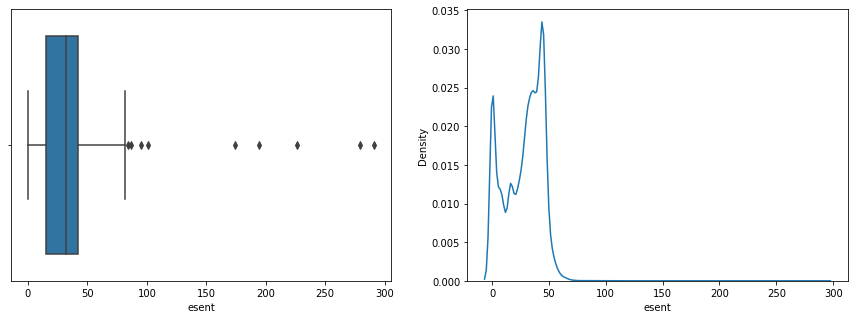

In [44]:

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(df1['esent'],ax=ax[0])
sns.distplot(df1['esent'],hist=False,ax=ax[1])
plt.show()

In [54]:
print(df1['esent'].describe())

count    25365.000000
mean        27.826493
std         16.708178
min          0.000000
25%         15.000000
50%         32.000000
75%         42.000000
max        291.000000
Name: esent, dtype: float64


In [55]:
df1['esent'].skew()


0.059630153892031065

#### From the descriptive analysis and skew value, we can see that the data is right skewed and the outliers exist on positive side of the data. Whether these are extreme values or outliers, can be found based on domain knowledge

## eopen

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


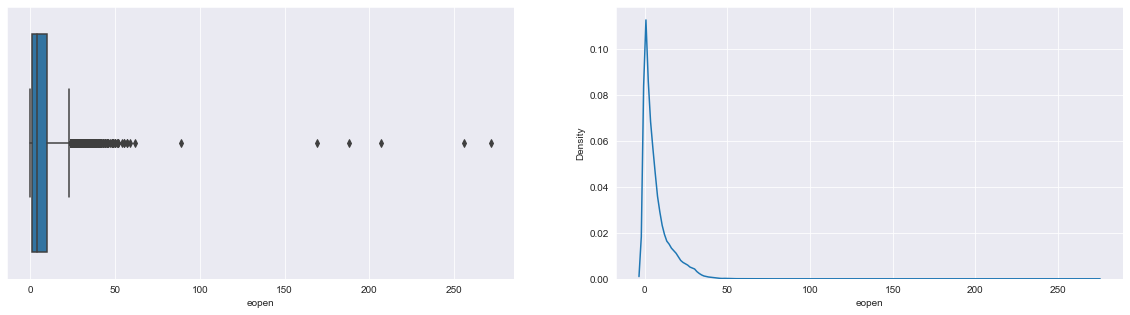

In [71]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(df1['eopen'],ax=ax[0])
sns.distplot(df1['eopen'],ax=ax[1],hist=False)
plt.show()


In [67]:
print(df1['eopen'].describe())

count    25365.000000
mean         6.828504
std          8.701855
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        272.000000
Name: eopen, dtype: float64


In [68]:
df1['eopen'].skew()

4.5644290134969685

##### The above descriptive analysis shows that most of the customers have opened around only 9 mails out of all promotional mails. The data is highly skewed on the positive indicating there are more outliers

## eopenrate

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


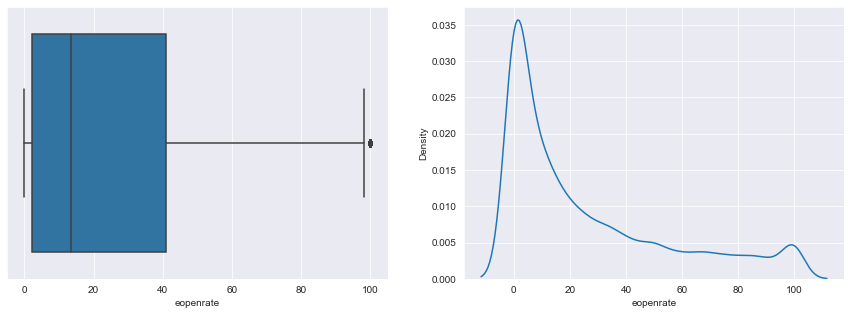

In [73]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(df1['eopenrate'], ax = ax[0])
sns.distplot(df1['eopenrate'], hist = False, ax = ax[1])
plt.show()

##### Since eopenrate gives the % measure of mails opened by customer with respect to mails sent to the customer. So the range is 0 to 100 %. There is only 1 outlier which is at 100%. But this cannot be eliminated because, most of the emails opened was in the range 0-10. There is a chance that only one mail was sent to the customer and opened by the customer. So as per this point, its not an outlier. Further analysis can be performed whether to check whether this value is an outlier or not.

## eclickrate

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


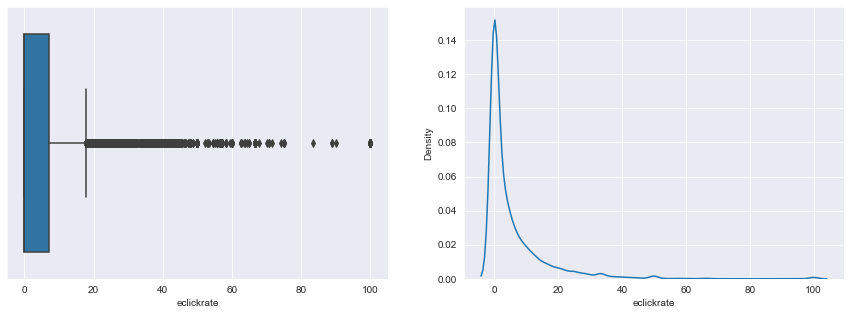

In [74]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(df1['eclickrate'], ax = ax[0])
sns.distplot(df1['eclickrate'], hist = False, ax = ax[1])
plt.show()

In [75]:
print(df1['eclickrate'].describe())


count    25365.000000
mean         5.706803
std         10.544961
min          0.000000
25%          0.000000
50%          0.000000
75%          7.142857
max        100.000000
Name: eclickrate, dtype: float64
3.8268788508703566


In [76]:
print(df1['eclickrate'].skew())

3.8268788508703566


### avgorder

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


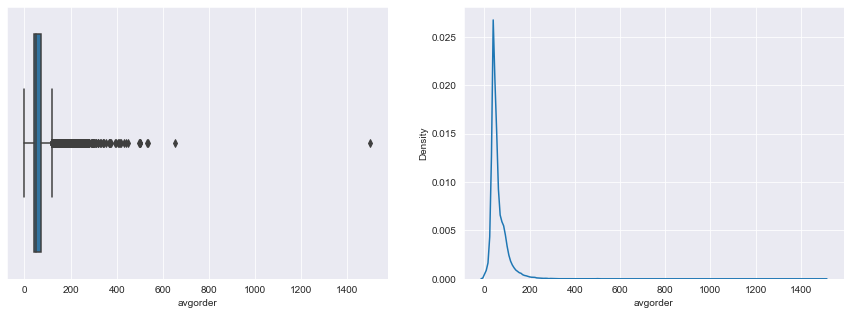

In [80]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(df1['avgorder'], ax = ax[0])
sns.distplot(df1['avgorder'], hist = False, ax = ax[1])
plt.show()

In [82]:
print(df1['avgorder'].describe())

count    25365.000000
mean        60.619777
std         37.760242
min          0.000000
25%         40.020000
50%         50.320000
75%         72.390000
max       1500.420000
Name: avgorder, dtype: float64


In [83]:
print(df1['avgorder'].skew())

4.968353551324804


In [84]:
df1[df1['avgorder']<200].describe().T

,count,mean,std,min,25%,50%,75%,max
retained,25119.0,0.798758,0.400937,0.0,1.000000,1.000000,1.000000,1.000000
esent,25119.0,27.785262,16.678295,0.0,15.000000,32.000000,42.000000,291.000000
eopenrate,25119.0,25.805328,29.675585,0.0,2.127660,13.333333,40.909091,100.000000
eclickrate,25119.0,5.714546,10.546426,0.0,0.000000,0.000000,7.142857,100.000000
avgorder,25119.0,58.644511,30.446641,0.0,40.020000,50.150000,71.070000,199.970000
ordfreq,25119.0,0.030222,0.099519,0.0,0.000000,0.000000,0.023371,3.250000
paperless,25119.0,0.666547,0.471456,0.0,0.000000,1.000000,1.000000,1.000000
refill,25119.0,0.099168,0.298893,0.0,0.000000,0.000000,0.000000,1.000000
doorstep,25119.0,0.037064,0.188921,0.0,0.000000,0.000000,0.000000,1.000000
eopen,25119.0,6.827621,8.697749,0.0,1.000000,4.000000,10.000000,272.000000


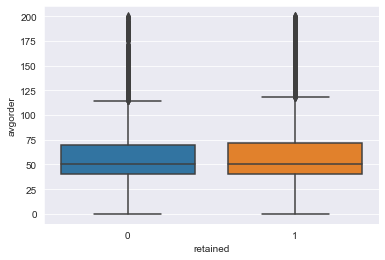

In [90]:

sns.boxplot(x=df1['retained'],y=df1[df1['avgorder']<200]['avgorder'])
plt.show()

## ordfreq

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


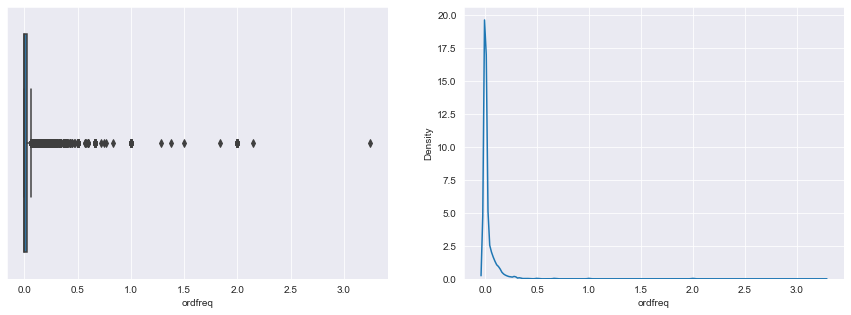

In [91]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(df1['ordfreq'], ax = ax[0])
sns.distplot(df1['ordfreq'], hist = False, ax = ax[1])
plt.show()

In [92]:
print(df1['ordfreq'].describe())

count    25365.000000
mean         0.030291
std          0.099180
min          0.000000
25%          0.000000
50%          0.000000
75%          0.023810
max          3.250000
Name: ordfreq, dtype: float64


In [93]:
print(df1['ordfreq'].skew())

12.320781409984516


## tenure

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


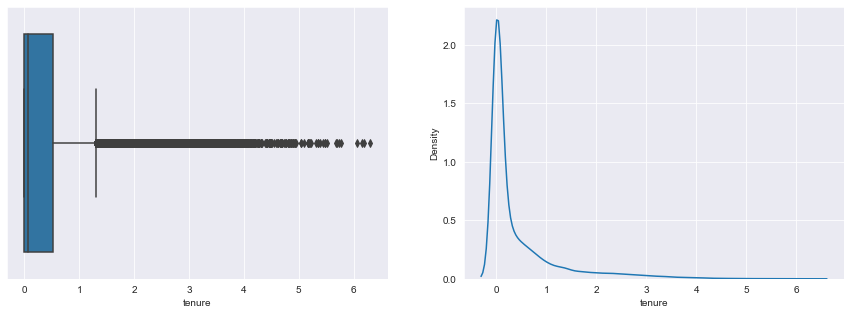

In [96]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(df1['tenure'], ax = ax[0])
sns.distplot(df1['tenure'], hist = False, ax = ax[1])
plt.show()

In [97]:
df1[df1['tenure']>5]['retained'].value_counts()

1    22
0     3
Name: retained, dtype: int64

In [98]:
print(df1['tenure'].describe())

count    25365.000000
mean         0.432770
std          0.784191
min          0.000000
25%          0.000000
50%          0.060274
75%          0.520548
max          6.306849
Name: tenure, dtype: float64


In [99]:
print(df1['tenure'].skew())

2.629796591300796


## recency

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


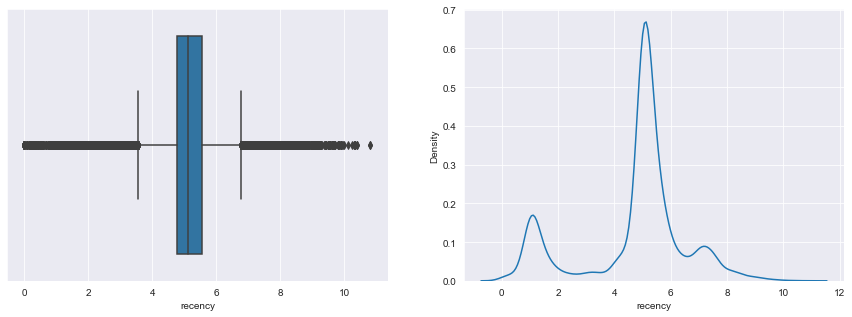

In [100]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(df1['recency'], ax = ax[0])
sns.distplot(df1['recency'], hist = False, ax = ax[1])
plt.show()

In [101]:
print(df1['recency'].describe())

count    25365.000000
mean         4.751001
std          1.867599
min          0.000000
25%          4.756164
50%          5.106849
75%          5.561644
max         10.813699
Name: recency, dtype: float64


In [102]:
df1['recency'].skew()

-0.7222936367720202

In [103]:
df1.skew()

retained      -1.489350
esent          0.059630
eopenrate      1.155148
eclickrate     3.826879
avgorder       4.968354
ordfreq       12.320781
paperless     -0.699822
refill         2.692245
doorstep       4.852494
eopen          4.564429
tenure         2.629797
recency       -0.722294
dtype: float64

# Categorical columns

In [107]:
def cat_plot(col):
    data =df[col]
    print(str(col).upper())
    print('count')
    print(df[col].value_counts())
    print('\n % of classes')
    print(df[col].value_counts()/len(df)*100)
    plt.figure(figsize = (5,4))
    fig = sns.countplot(data=df,x=data)
    plt.title(col)
    for p in fig.patches:
        fig.annotate(format(p.get_height()/df[col].count()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.show()

PAPERLESS
count
1    16871
0     8494
Name: paperless, dtype: int64

 % of classes
1    66.512911
0    33.487089
Name: paperless, dtype: float64


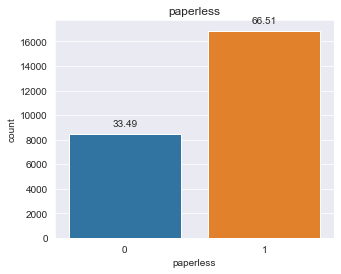

REFILL
count
0    22863
1     2502
Name: refill, dtype: int64

 % of classes
0    90.136014
1     9.863986
Name: refill, dtype: float64


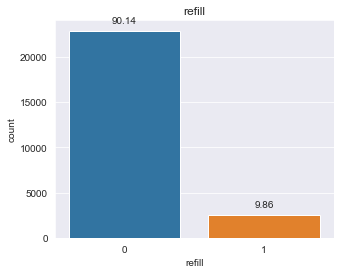

DOORSTEP
count
0    24408
1      957
Name: doorstep, dtype: int64

 % of classes
0    96.227085
1     3.772915
Name: doorstep, dtype: float64


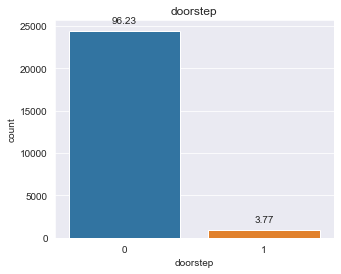

FAVDAY
count
Monday       5674
Tuesday      5642
Friday       4503
Thursday     4288
Wednesday    4010
Saturday     1044
Sunday        204
Name: favday, dtype: int64

 % of classes
Monday       22.369407
Tuesday      22.243249
Friday       17.752809
Thursday     16.905184
Wednesday    15.809186
Saturday      4.115908
Sunday        0.804258
Name: favday, dtype: float64


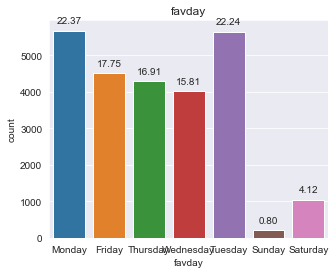

CITY
count
BOM    9738
DEL    7371
MAA    6893
BLR    1363
Name: city, dtype: int64

 % of classes
BOM    38.391484
DEL    29.059728
MAA    27.175241
BLR     5.373546
Name: city, dtype: float64


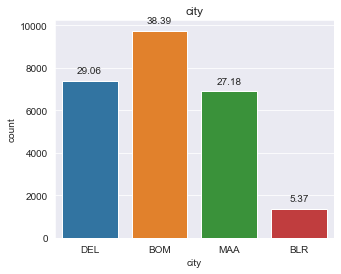

RETAINED
count
1    20257
0     5108
Name: retained, dtype: int64

 % of classes
1    79.862015
0    20.137985
Name: retained, dtype: float64


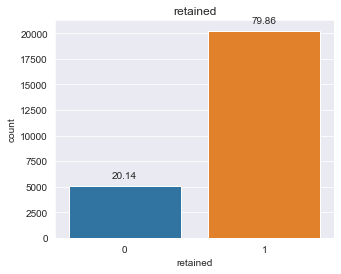

In [111]:
for i in cat_cols:
    cat_plot(i)

# Bivariate Analysis (Independent feature vs Dependent feature)

## In the below bivariate analysis, each independent feature is compared with the target variable

### esent

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


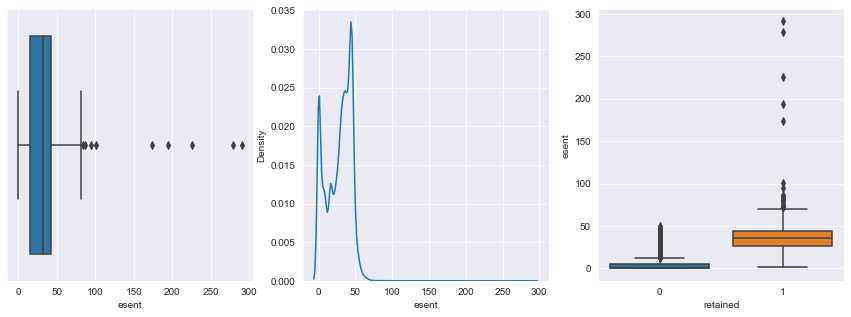

In [112]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(df1['esent'], ax = ax[0])
sns.distplot(df1['esent'], hist = False, ax = ax[1])
sns.boxplot(data=df1,x='retained',y='esent',ax=ax[2])
plt.show()

As we can see, there are few outliers in the esent column. The kdeplot shows there are two peaks - one near 0 and another one between 40-50. Also above 50, kdeplot shows density values almost equal to 0. The range values for customer retained and not retained, shows a major difference. All the outlier values have a retained value of 1. Means higher the esent, the customer is more likely to be retained

In [113]:
#looking into the modes
df1['esent'].value_counts()

0      2666
45     1684
44      983
16      892
36      738
       ... 
279       1
87        1
291       1
101       1
95        1
Name: esent, Length: 87, dtype: int64

In [114]:
df1[df1['esent']==0]['retained'].value_counts()

0    2666
Name: retained, dtype: int64

In [115]:
df1[df1['esent']==45]['retained'].value_counts()

1    1684
Name: retained, dtype: int64

In [117]:
df1[df1['esent']==44]['retained'].value_counts()

1    978
0      5
Name: retained, dtype: int64

In [119]:
df1[df1['esent']>45]['retained'].value_counts()

1    2625
0       4
Name: retained, dtype: int64

##### When esent>=44, i.e., when customer has received more than 45 promotional mails from the retailer, the customer is more likely to be retained. When esent=45, All the customers were retained

In [120]:
df1[df1['esent']>50]['retained'].value_counts()

1    782
Name: retained, dtype: int64

###### When esent>50, All the customers were retained

### INSIGHTS:

#### From the above analysis, esent has a significance on the target variable 'retained'. Below are the observations:

#### When no promotional mails were sent, none of the customers were retained.

#### When more than 40 (in a range if 40 to 50) promotional mails were sent, customers were more likely to be retained

##### When more than 50 promotional mails were sent, all the customers were retained.

## eopen

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


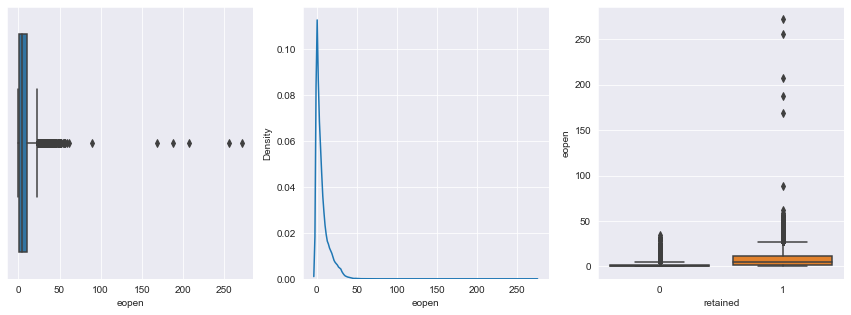

In [121]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(df1['eopen'], ax = ax[0])
sns.kdeplot(df1['eopen'], ax = ax[1])
sns.boxplot(data=df1,x='retained',y='eopen',ax=ax[2])
plt.show()

In eopen column, there are more outliers compared to esent. Since eopen was calculated based on esent column, there must be similarity of characters between them. Lets analyse eopen column using same modal analysis that we used for esent column. Boxplots between retained and eopen shows a significant difference. All the eopen outliers have retained=1

In [122]:
df1[df1['eopen']==0]['retained'].value_counts()

1    3123
0    3054
Name: retained, dtype: int64

When none of the emails were opened by the customer, it doesnot show significant difference on target variable as esent had. Probability of retention of a customer who never opened a promotional mail from the retailer is same as that of the customer who will churn. (50-50 chance)

In [123]:
# when eopen>40
df1[df1['eopen']>40]['retained'].value_counts()

1    89
Name: retained, dtype: int64

In [124]:
df1[(df1['retained']==0)]['eopen'].describe()

count    5108.000000
mean        1.595732
std         3.163398
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        35.000000
Name: eopen, dtype: float64

In [125]:
df1[(df1['retained']==1)]['eopen'].describe()

count    20257.000000
mean         8.147998
std          9.145940
min          0.000000
25%          2.000000
50%          5.000000
75%         12.000000
max        272.000000
Name: eopen, dtype: float64

In [126]:
df1['eopen'].describe()

count    25365.000000
mean         6.828504
std          8.701855
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        272.000000
Name: eopen, dtype: float64

 From the descriptive analysis, we can see that, most of the eopen values lies between 0-9

In [128]:
df1[df1['eopen']>9]['retained'].value_counts()

1    6219
0     167
Name: retained, dtype: int64

When eopen is greater than 40, the customer will definitely be retained. Because it makes sense that customer would open these many promotional mails only if the customer is interested in company's new launches, offers or any customized suggestions.

If customer has opened atleast 9 mails, there is a 97% chance that the customer will be retained. Also we can see that 50% the churned customers have never opened any of the promotional mails from retailer

### INSIGHTS:

###### In this column, there are no outliers. They are all extreme values.

###### When none of the emails were opened by the customer, it doesnot show significant difference on target variable as esent had. Probability of retention of a customer who never opened a promotional mail from the retailer is same as that of the customer who will churn. (50-50 chance)

###### When eopen is greater than 40, the customer will definitely be retained. Because it makes sense that customer would open these many promotional mails only if the customer is interested in company's new launches, offers or any customized suggestions.

###### When the customer has opened more than 9 promotional mails, there's a 97% possibility that the customer will be retained. Also we can see that 50% the churned customers have never opened any of the promotional mails from retailer

## eopenrate

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


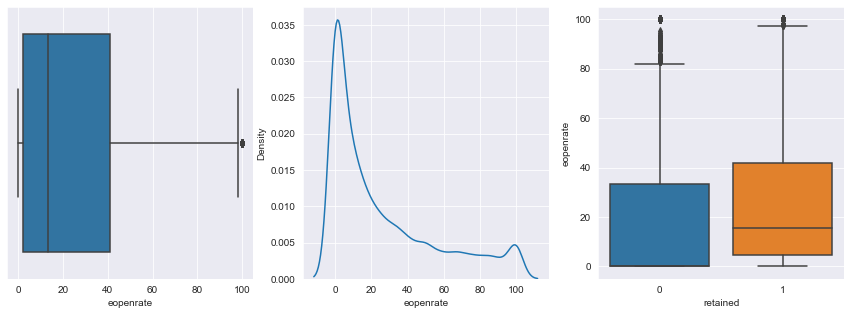

In [130]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(df1['eopenrate'], ax = ax[0])
sns.distplot(df1['eopenrate'], hist = False, ax = ax[1])
sns.boxplot(data=df1,x='retained',y='eopenrate',ax=ax[2])
plt.show()

In [131]:
len(df1[df1['eopenrate']==100])

# There is only 1 outlier in eopenrate which is equal to 100%. Actually in our dataset we have 967 rows that have an eopenrate 
# of 100%. There might be situations like, only 1 email was sent to the customer and the customer has opened that email,
# in that case eopenrate would be 100%. 
# So this cannot be considered an outlier but an extreme value which adds information to our model

967

In [132]:
df1.groupby('retained')['eopenrate'].mean()

retained
0    22.069363
1    26.695086
Name: eopenrate, dtype: float64

### INSIGHTS:

##### There is only 1 outlier in eopenrate which is equal to 100%. Actually in our dataset we have 967 rows that have an eopenrate of 100%. There might be situations like, only 1 email was sent to the customer and the customer has opened that email,in that case eopenrate would be 100%. So this cannot be considered an outlier but an extreme value which adds information to our model

##### Also we can see that range of eopenrate for retained customers is slightly more than eopenrate range for churned customers. Though the mean value for both the groups differs slightly, it will add information to our model along with other features

# eclickrate

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


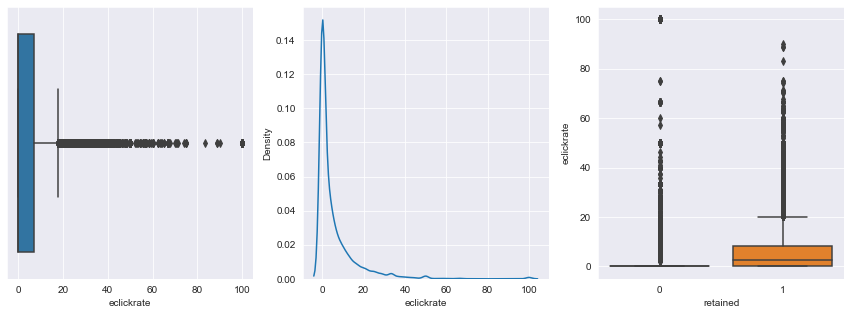

In [134]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(df1['eclickrate'], ax = ax[0])
sns.kdeplot(df1['eclickrate'], ax = ax[1])
sns.boxplot(data=df1,x='retained',y='eclickrate',ax=ax[2])
plt.show()

In [135]:
df1[(df1['retained']==0)]['eclickrate'].describe()

count    5108.000000
mean        4.777780
std        15.154162
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: eclickrate, dtype: float64

In [136]:
df1[(df1['retained']==1)]['eclickrate'].describe()

count    20257.000000
mean         5.941065
std          9.003588
min          0.000000
25%          0.000000
50%          2.564103
75%          8.108108
max         90.000000
Name: eclickrate, dtype: float64

In [137]:
df1.groupby(['retained'])['eclickrate'].mean()

retained
0    4.777780
1    5.941065
Name: eclickrate, dtype: float64

#### INSIGHTS:

###### From the descriptive analysis, we can see that, for 75% of the churned customers, eclickrate = 0, which makes sense because either the customer hasnt opened the email or customer opened the mail but was not interested in the offers given. 
###### From the eopen data, we know that 50% of the churned customers have not opened any of the mails. So obviously their clickrate would be zero. And So this pattern is seen in the churned customers.

###### Since the averages vary slightly, along with other features, it can add information to our model

## avgorder

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


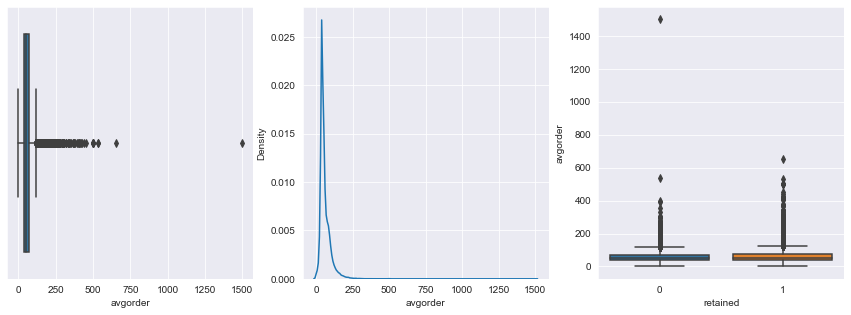

In [139]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(df1['avgorder'], ax = ax[0])
sns.kdeplot(df1['avgorder'], ax = ax[1])
sns.boxplot(data=df1,x='retained',y='avgorder',ax=ax[2])
plt.show()

In [140]:
df1.groupby(['retained'])['avgorder'].mean()

retained
0    60.492909
1    60.651768
Name: avgorder, dtype: float64

### INSIGHTS:

###### As per the domain knowledge, these values are not outliers. They are extreme values

###### The avgorder column shows no difference in the range values of retained and churned groups. Their averages are same. So it doesnot add any information to our model. But still we'll go with the statistical test to determine whether its a signifcant feature or not.

## ordfreq

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


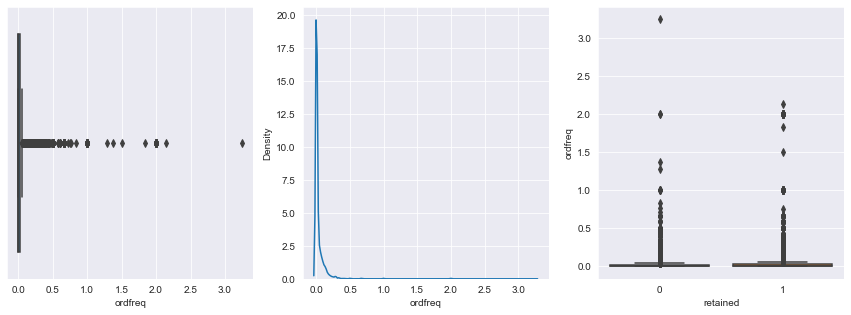

In [141]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(df1['ordfreq'], ax = ax[0])
sns.kdeplot(df1['ordfreq'], ax = ax[1])
sns.boxplot(data=df1,x='retained',y='ordfreq',ax=ax[2])
plt.show()

In [142]:
df1[(df1['retained']==0)]['ordfreq'].describe()

count    5108.000000
mean        0.027522
std         0.096685
min         0.000000
25%         0.000000
50%         0.000000
75%         0.016180
max         3.250000
Name: ordfreq, dtype: float64

In [145]:
df1.groupby(['retained'])['ordfreq'].mean()

retained
0    0.027522
1    0.030989
Name: ordfreq, dtype: float64

### INSIGHTS:

###### As per the domain knowledge, these values are not outliers. They are extreme values

###### The ordfreq column shows no difference in the range values of retained and churned groups. Their averages are same. So it doesnot add any information to our model. But still we'll go with the statistical test to determine whether its a signifcant feature or not

## tenure

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


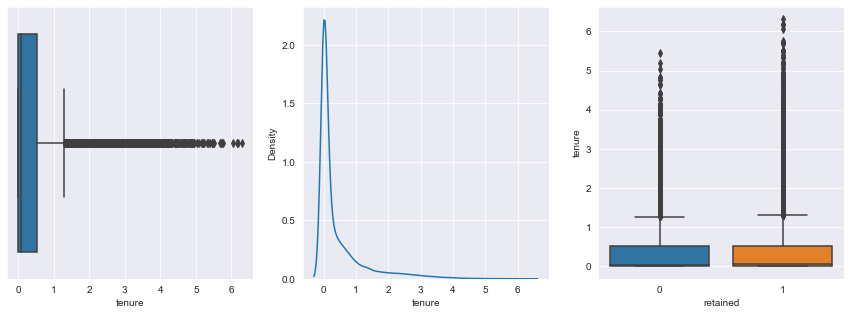

In [147]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(df1['tenure'], ax = ax[0])
sns.kdeplot(df1['tenure'], ax = ax[1])
sns.boxplot(data=df1,x='retained',y='tenure',ax=ax[2])
plt.show()

In [148]:
df1.groupby('retained')['tenure'].mean()

retained
0    0.421829
1    0.435529
Name: tenure, dtype: float64

In [149]:
df1['tenure'][df1['retained']==0].describe()

count    5108.000000
mean        0.421829
std         0.767000
min         0.000000
25%         0.000000
50%         0.032877
75%         0.509589
max         5.443836
Name: tenure, dtype: float64

In [150]:
df1['tenure'][df1['retained']==1].describe()

count    20257.000000
mean         0.435529
std          0.788462
min          0.000000
25%          0.000000
50%          0.063014
75%          0.523288
max          6.306849
Name: tenure, dtype: float64

### INSIGHTS:

###### As per the domain knowledge, these values are not outliers. They are extreme values

###### tenure column shows no difference in the range values of retained and churned groups. Their averages are same. So it doesnot add any information to our model. But still we'll go with the statistical test to determine whether its a signifcant feature or not

###### Irrespective of the customer retention, around 75% of the customers in both the groups have shorter tenure of 0.5

### recency

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


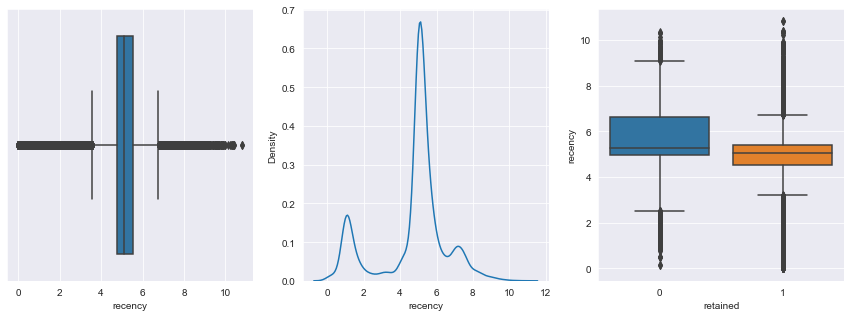

In [151]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(df1['recency'], ax = ax[0])
sns.kdeplot(df1['recency'], ax = ax[1])
sns.boxplot(data=df1,x='retained',y='recency',ax=ax[2])
plt.show()

In [152]:
df1['recency'][df1['retained']==1].describe()

count    20257.000000
mean         4.611305
std          1.810870
min          0.000000
25%          4.523288
50%          5.057534
75%          5.408219
max         10.813699
Name: recency, dtype: float64

In [153]:
df1['recency'][df1['retained']==0].describe()

count    5108.000000
mean        5.305000
std         1.982904
min         0.167123
25%         4.980822
50%         5.265753
75%         6.625342
max        10.347945
Name: recency, dtype: float64

In [154]:
df1.groupby(['retained'])['recency'].mean()

retained
0    5.305000
1    4.611305
Name: recency, dtype: float64

###### As per the domain knowledge, these values are not outliers. They are extreme values

###### recency column shows no difference in the range values of retained and churned groups. Their averages are same. So it doesnot add any information to our model. But still we'll go with the statistical test to determine whether its a signifcant feature or not

## numerical columns vs retained

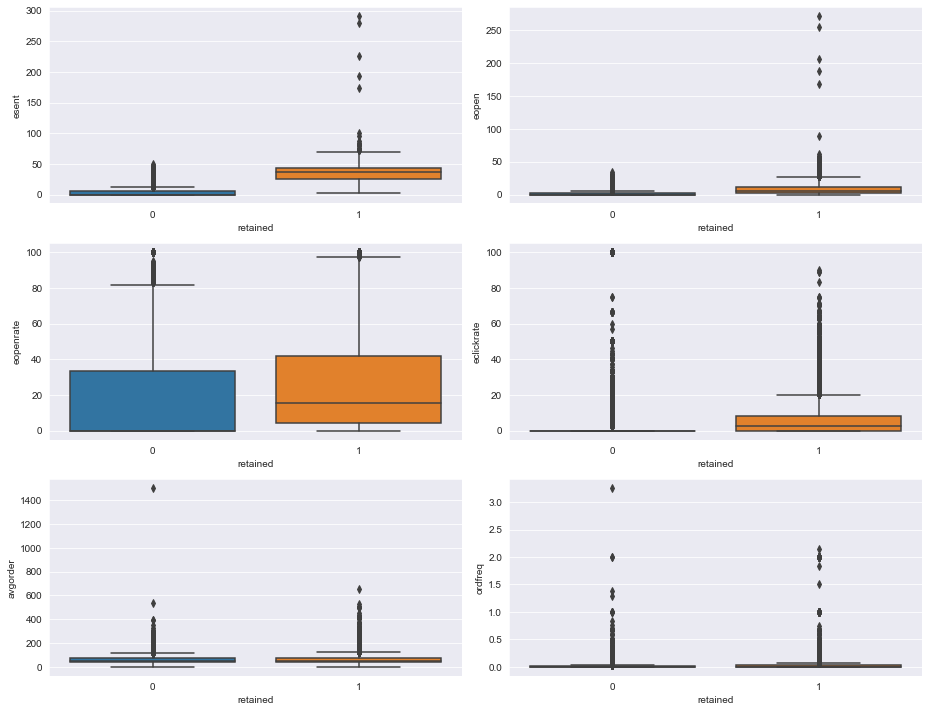

In [156]:
fig,axes = plt.subplots(3,2,sharex=False,figsize=(13,10))
sns.boxplot(y=df[num_cols[0]],x=df['retained'],ax=axes[0,0])
sns.boxplot(y=df[num_cols[1]],x=df['retained'],ax=axes[0,1])
sns.boxplot(y=df[num_cols[2]],x=df['retained'],ax=axes[1,0])
sns.boxplot(y=df[num_cols[3]],x=df['retained'],ax=axes[1,1])
sns.boxplot(y=df[num_cols[4]],x=df['retained'],ax=axes[2,0])
sns.boxplot(y=df[num_cols[5]],x=df['retained'],ax=axes[2,1])
plt.tight_layout()
plt.show()

### paperless vs retained

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


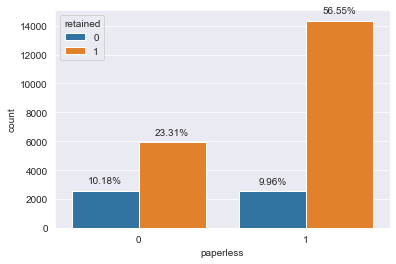

In [163]:
fig=sns.countplot(df1['paperless'],hue=df1['retained'])
for p in fig.patches:
    fig.annotate(str(format(p.get_height()/len(df1)*100, '.2f'))+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

## doorstep vs retained

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


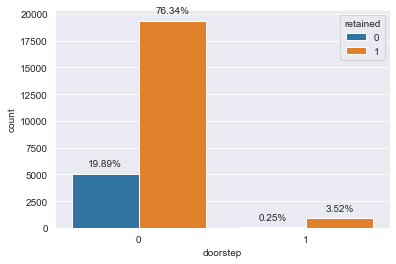

In [159]:
fig=sns.countplot(df1['doorstep'],hue = df1['retained'])
for p in fig.patches:
    fig.annotate(str(format(p.get_height()/len(df1)*100, '.2f'))+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

## favday vs retained

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


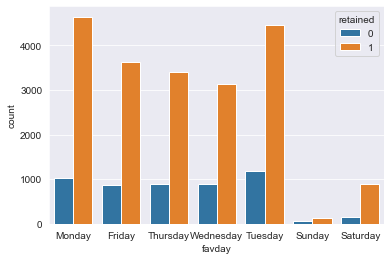

In [164]:
fig=sns.countplot(df1['favday'],hue = df1['retained'])


## city vs retained

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


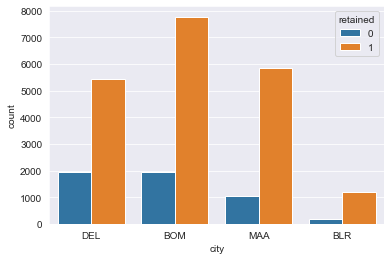

In [165]:
fig=sns.countplot(df1['city'],hue = df1['retained'])

## favday vs city

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


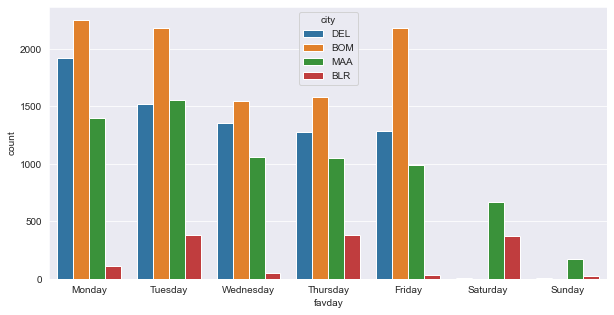

In [167]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,5))
sns.countplot( df1['favday'],hue=df1['city'],order=days)
plt.show()